## <font color='gray'> Biblioteca Pandas

A biblioteca **Pandas** tem código aberto que fornece estruturas de dados de alta performance e fácil de utilizar, é também uma ótima ferramenta para manipulação de dados.

O nome **Pandas** vem da combinação de Panel Data e Python Data Analysis.

O apelido usado pela comunidade para o **Pandas** é o **pd**, portanto, carregar o **Pandas** e nomear como pd é considerado uma prática padrão para toda a documentação do **Pandas**.

Ela possui uma ótima **documentação**:
https://pandas.pydata.org/

In [ ]:
# 1° precisamos instalar a biblioteca Pandas
# !pip install pandas

In [ ]:
# instalamos a biblioteca Pandas, agora precisamos acionar ela no notebook
import pandas as pd

# <font color='gray'> Estrutura de Dados

Vamos entender como é a estrutura de dados em **Pandas**.
    
---

## <font color='gray'> Dataframe

*DataFrame* é uma estrutura de dados tabular bidimensional mutável em tamanho, e pode armazenar diferentes tipos de dados (int, float, string, date e etc.), com eixos rotulados (linhas e colunas), estrutura parecida com uma planilha de Excel/ Google Sheet.
    
**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

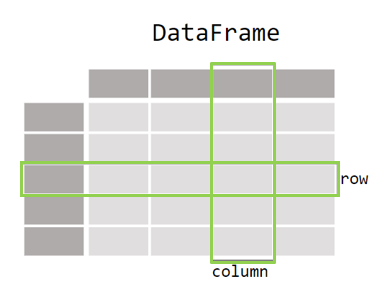


In [ ]:
# criando uma lista de textos, listas são indicadas por colchetes
lista = ['Deborah', 50, 'Quenia', 50.13]
type(lista)

In [ ]:
lista

In [ ]:
# criando um dataframe com a lista criada anteriormente
primeiro_df = pd.DataFrame(lista)
primeiro_df

In [ ]:
# nomeando a coluna
primeiro_df = pd.DataFrame(lista, columns=['Nome'])
primeiro_df

## <font color='gray'> Series

**Series** é uma matriz rotulada unidimensional capaz de conter qualquer tipo de dados (inteiros, strings (texto), números decimal, objetos Python, etc.), os rótulos dos eixos são chamados de índice.

Cada coluna no **dataframe** é uma series, é igual uma coluna no Excel/ Google Sheet.

O índice começa no zero, lembrando que no Excel o índice começa no 1.
    
**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.Series.html

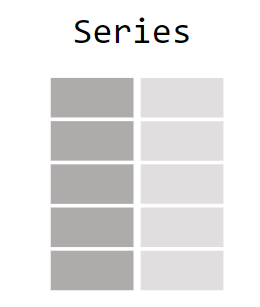




In [ ]:
# criando uma serie
series = pd.Series(data=[1,2,3,4,5])
series

In [ ]:
# criando uma serie com índice texto
series = pd.Series(data=[1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
series

In [ ]:
# criando uma serie com índice começando no n° 1
series = pd.Series(data=[1,2,3,4,5], index=[1,2,3,4,5])
series

# <font color='gray'> Importar arquivos xlsx e csv

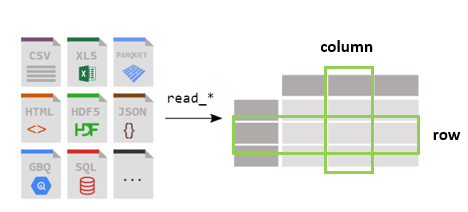



1.   Precisamos carregar o arquivo para o ambiente Python;
2.   Iremos usar o método *read_excel* da biblioteca **Pandas** para importar arquivos de extesão xls ou xlsx, podemos também usar o *read_csv* para importar arquivos de extesão csv.
    
**Documentação:**
    
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://pandas.pydata.org/docs/reference/io.html

**link dados**: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

In [ ]:
df = pd.read_csv('dados/acidentes2025.csv', encoding='latin-1', sep=';')
df

**Agora sua vez:** faça o importe dos dados

## <font color='gray'> Importando outra aba do arquivo
----

Por padrão a biblioteca **Pandas** importa sempre a primeira aba da planilha, mas sabemos que nem sempre precisamos apenas da primeira aba, muitas vezes precisamos trabalhar com as outras abas dentro da planilha, mas para isso há um argumento dentro do método *read_excel* chamado *sheet_name*, com este argumento conseguimos declarar qual aba queremos importar.

**Documentação:**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html?highlight=read_excel#pandas.read_excel

In [ ]:
# importando os dados utilizando os parametros padroes
df_xlsx = pd.read_excel('dados/acidentes2025.xlsx')
df_xlsx

In [ ]:
# especificando uma aba
df_fds = pd.read_excel('dados/acidentes2025.xlsx',
                     sheet_name='fds')
df_fds

### <font color='gray'> Usar uma coluna da planilha como índice

----

Em muitos casos precisamos usar uma coluna como índice, para isso iremos usar o argumento *index_col*, com ele podemos especificar a coluna que desejamos usar como índice.

In [ ]:
df_indice = pd.read_excel('dados/acidentes2025.xlsx',
                       sheet_name='fds',
                       index_col='id')
df_indice

### <font color='gray'> Pular colunas e linhas

----

Por padrão o método *read_excel* assume que a primeira linha do *dataframe* é uma lista de colunas, formando o cabeçario do *dataframe* - nomes das colunas.

Para isso usaremos os argumentos *header* e *skiprows* para manipluar o cabeçario e as linhas.

In [ ]:
df_col_linhas = pd.read_excel('dados/acidentes2025.xlsx',
                     sheet_name='fds',
                     header=None,
                     skiprows=2)
df_col_linhas

### <font color='gray'> Importar colunas específicas

----

Por vezes não precisamos usar todas as colunas do *dataframe*, e para não sobrecarregar a memória e o desempenho da nossa máquina, há um argumento que conseguimos usar para especificar quais colunas queremos usar, sendo ele o *usecols*.

In [ ]:
df_colunas =  pd.read_excel('dados/acidentes2025.xlsx',
                          usecols=['dia_semana','horario'])
df_colunas

## <font color='gray'> **1° Desafio: importar a aba de *dia_semana* do arquivo e chamar o *dataframe* de *df_semana*** </font>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://media.giphy.com/media/XoV0OMim9iQGjnLtBv/giphy.gif?cid=ecf05e47yyn92iffmsgb1hyw99u3e6hiurysgra611x3mflh&rid=giphy.gif&ct=g")

In [ ]:
# Resposta: 1° Desafio

# <font color='gray'> Importar múltiplas abas

----

Vamos usar a função *ExcelFile* para a leitura do arquivo **Excel**, e o atributo *sheet_names* para identificar os nomes das abas do arquivo.

E com o método *parse* conseguimos carregar a aba que desejamos.

**Documentação:**

https://pandas.pydata.org/docs/reference/api/pandas.ExcelFile.parse.html?highlight=excelfile

In [ ]:
# Leitura do arquivo
df = pd.ExcelFile('dados/acidentes2025.xlsx')
df

In [ ]:
# Identificando os nomes das abas do arquivo
df.sheet_names

In [ ]:
# Método parse
df_excel = df.parse('fds')
df_excel

## <font color='gray'> Carregar múltiplas abas e transformar em um único *dataframe*

----

Para esta etapa iremos utilizar o método chamado *concat*.

**Documentação:**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat

In [ ]:
# Criando uma lista vazia
acidentes_abas = []

# Percorrendo as abas da planilha
for aba in df.sheet_names:
    abas = df.parse(aba)
    acidentes_abas.append(abas)

# Criando um único dataframe usando o objeto concat
acidentes = pd.concat(acidentes_abas)

In [ ]:
# Visualizando a lista com as abas do arquivo
acidentes_abas

In [ ]:
# Visualizando o arquivo completo
acidentes

# <font color='gray'> Inspencionando os dados
    
Vamos aprender como inspencionar algumas informações importantes de forma rápida do *dataframe*.

---
    
## <font color='gray'> Visualizando as primeiras e últimas linhas do *dataframe*

Os métodos *head* e *tail* fazem parte da biblioteca **Pandas**, e nos auxiliam a ver um resumo dos dados do *dataframe*.

O método *head* retorna por padrão as 5 primeiras linhas, já o método *tail* por padrão nos retorna as 5 últimas linhas,  mas podemos alterar os valores de retorno para menos ou mais quantidade.
    
**Documentação**:
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html

In [ ]:
# 5 primeiras linhas
df.head()

In [ ]:
# 5 últimas linhas
df.tail()

In [ ]:
# determinando a quantidade de linhas 
df.tail()

## <font color='gray'> Informações dos dados do *dataframe*

O atributo *shape* retorna as dimensões do dataframe.

O método *info* retorna informações úteis, como os tipos de dados por coluna e quantidade de linhas e colunas do *dataframe*.
    
**Documentação:**
    
 https://pandas.pydata.org/pandas-docs/version/1.3.0/reference/api/pandas.DataFrame.shape.html
 
 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
# dimensão dos dados
df.shape

In [ ]:
# resumo de informações dos dados
df.info()

## <font color='gray'> Identificando dados únicos nas colunas 

O método *unique* identifica os elementos únicos e retorna em ordem de aparecimento.
    
**Documentação:**
 
https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [ ]:
# retorna as classes únicas da coluna
df['dia_semana'].unique()

In [ ]:
# retorna o número inteiro de classes únicas da coluna
df['dia_semana'].nunique()

## <font color='gray'> Identificando as colunas do *dataframe*

O atributo *columns* retorna uma lista com os nomes das colunas do *dataframe*.
    
**Documentação:** 
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html

In [ ]:
df.columns

## <font color='gray'> Desafio: </font>

1.   retornar os 15 primeiros registros dos 3 *dataframes*;
2.   retornar os 15 últimos registros dos 3 *dataframes*; e
3.   informar a dimesão dos 3 *dataframes*.

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://media.giphy.com/media/XoV0OMim9iQGjnLtBv/giphy.gif?cid=ecf05e47yyn92iffmsgb1hyw99u3e6hiurysgra611x3mflh&rid=giphy.gif&ct=g")

In [ ]:
# resposta 1:

In [ ]:
# resposta 2:

In [ ]:
# resposta 3: